In [1]:
# import dependencies
import pandas as pd
import json
from pprint import pprint
import os
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
# create new columns to store data in city_df dataframe
#city = cities
#len(city)
city_df= pd.DataFrame(cities).reset_index()
city_df=city_df.rename(columns={0:'City_Name'})
city_df=city_df.loc[:, ["City_Name"]]
city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Long'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""
#city_df.head()


In [4]:
# Extract the required information from the API by creating base_url and query strings.
# Use the for loop to go through all the cities extracted in the dataframe city_df
base_url= "http://api.openweathermap.org/data/2.5/weather?"
count=0
x =1
for index, row in city_df.iterrows():

    # get city type from df
    city_type = row['City_Name']

    # add keyword to params dict
   
    query_url = base_url +"appid=" + api_key  + "&q=" + city_type + "&units=imperial"
    print(query_url)
    # assemble url and make API request
   
    response = requests.get(query_url).json()
    result = response 
    if result["cod"] != 200: 
                
        print(f"City not found : Skipping")
    else:
            
        city_df.loc[index, 'Cloudiness'] = result['clouds']['all']
        city_df.loc[index, 'Country'] = result['sys']['country']
        city_df.loc[index, 'Date'] = result['dt'] 
        city_df.loc[index, 'Humidity'] = result['main']['humidity']        
        city_df.loc[index, 'Lat'] = result['coord']['lat']
        city_df.loc[index, 'Long'] = result['coord']['lon']
        city_df.loc[index, 'Max_Temp'] = result['main']['temp_max']
        city_df.loc[index, 'Wind_Speed'] =result['wind']['speed']

  
        count=count+1
       
            
        state = f'processing record {count} of set 1| {city_type}.'
        
        print(state)
        print(query_url)    
        
        
        


http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=butaritari&units=imperial
processing record 1 of set 1| butaritari.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=butaritari&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=gamba&units=imperial
processing record 2 of set 1| gamba.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=gamba&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=barrow&units=imperial
processing record 3 of set 1| barrow.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=barrow&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=taltal&units=imperial
processing record 4 of set 1| taltal.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be2

processing record 31 of set 1| hambantota.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hambantota&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ongandjera&units=imperial
processing record 32 of set 1| ongandjera.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ongandjera&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kodiak&units=imperial
processing record 33 of set 1| kodiak.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kodiak&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tiznit&units=imperial
processing record 34 of set 1| tiznit.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tiznit&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=1

processing record 63 of set 1| san isidro.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=san isidro&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=guozhen&units=imperial
processing record 64 of set 1| guozhen.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=guozhen&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tamandare&units=imperial
processing record 65 of set 1| tamandare.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tamandare&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=makinsk&units=imperial
processing record 66 of set 1| makinsk.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=makinsk&units=imperial
http://api.openweathermap.org/data/2.5/weather?appi

processing record 91 of set 1| tuktoyaktuk.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tuktoyaktuk&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bambous virieux&units=imperial
processing record 92 of set 1| bambous virieux.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bambous virieux&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ancud&units=imperial
processing record 93 of set 1| ancud.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ancud&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ustupo&units=imperial
processing record 94 of set 1| ustupo.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ustupo&units=imperial
http://api.openweathermap.org/data/2.5/w

processing record 122 of set 1| bathsheba.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bathsheba&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bluff&units=imperial
processing record 123 of set 1| bluff.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bluff&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=longyearbyen&units=imperial
processing record 124 of set 1| longyearbyen.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=longyearbyen&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=la ronge&units=imperial
processing record 125 of set 1| la ronge.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=la ronge&units=imperial
http://api.openweathermap.org/data/2.5/weat

processing record 151 of set 1| itoman.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=itoman&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=port hedland&units=imperial
processing record 152 of set 1| port hedland.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=port hedland&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=cidreira&units=imperial
processing record 153 of set 1| cidreira.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=cidreira&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=victoria&units=imperial
processing record 154 of set 1| victoria.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=victoria&units=imperial
http://api.openweathermap.org/data/2.5/w

processing record 181 of set 1| korcula.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=korcula&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=khasan&units=imperial
processing record 182 of set 1| khasan.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=khasan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=damietta&units=imperial
processing record 183 of set 1| damietta.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=damietta&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tiksi&units=imperial
processing record 184 of set 1| tiksi.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tiksi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e18

processing record 209 of set 1| san andres.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=san andres&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=touros&units=imperial
processing record 210 of set 1| touros.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=touros&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=katobu&units=imperial
processing record 211 of set 1| katobu.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=katobu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kushchevskaya&units=imperial
processing record 212 of set 1| kushchevskaya.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kushchevskaya&units=imperial
http://api.openweathermap.org/data/2.5/we

processing record 241 of set 1| olinda.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=olinda&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=dilijan&units=imperial
processing record 242 of set 1| dilijan.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=dilijan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=taoudenni&units=imperial
processing record 243 of set 1| taoudenni.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=taoudenni&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=seoul&units=imperial
processing record 244 of set 1| seoul.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=seoul&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e

processing record 272 of set 1| komsomolets.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=komsomolets&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=dubti&units=imperial
processing record 273 of set 1| dubti.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=dubti&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=xining&units=imperial
processing record 274 of set 1| xining.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=xining&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=faanui&units=imperial
processing record 275 of set 1| faanui.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=faanui&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e

processing record 301 of set 1| fuerte olimpo.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=fuerte olimpo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mogadishu&units=imperial
processing record 302 of set 1| mogadishu.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mogadishu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=egvekinot&units=imperial
processing record 303 of set 1| egvekinot.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=egvekinot&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=vedaranniyam&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=vila franca do campo&units=imperial
processing record 304 of set 1| 

processing record 328 of set 1| behbahan.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=behbahan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=divo&units=imperial
processing record 329 of set 1| divo.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=divo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aklavik&units=imperial
processing record 330 of set 1| aklavik.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aklavik&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=nuuk&units=imperial
processing record 331 of set 1| nuuk.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=nuuk&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c7171

processing record 357 of set 1| igrim.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=igrim&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tabiauea&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chato&units=imperial
processing record 358 of set 1| chato.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chato&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kamenskoye&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=nador&units=imperial
processing record 359 of set 1| nador.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=nador&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842

processing record 385 of set 1| kibaya.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kibaya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ibra&units=imperial
processing record 386 of set 1| ibra.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ibra&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hervey bay&units=imperial
processing record 387 of set 1| hervey bay.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hervey bay&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hastings&units=imperial
processing record 388 of set 1| hastings.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hastings&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d18

processing record 414 of set 1| kenitra.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kenitra&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mongar&units=imperial
processing record 415 of set 1| mongar.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mongar&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hofn&units=imperial
processing record 416 of set 1| hofn.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hofn&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=port augusta&units=imperial
processing record 417 of set 1| port augusta.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=port augusta&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d

processing record 444 of set 1| chau doc.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chau doc&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=zhigansk&units=imperial
processing record 445 of set 1| zhigansk.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=zhigansk&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chagda&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=manzil tamim&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mallaig&units=imperial
processing record 446 of set 1| mallaig.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mallaig&units=imperial
http://api.openweathermap.org/data/2.5/

processing record 472 of set 1| narrabri.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=narrabri&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=pombas&units=imperial
processing record 473 of set 1| pombas.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=pombas&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=beisfjord&units=imperial
processing record 474 of set 1| beisfjord.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=beisfjord&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chisec&units=imperial
processing record 475 of set 1| chisec.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chisec&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1

processing record 502 of set 1| huescar.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=huescar&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=leningradskiy&units=imperial
processing record 503 of set 1| leningradskiy.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=leningradskiy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=la asuncion&units=imperial
processing record 504 of set 1| la asuncion.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=la asuncion&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=moranbah&units=imperial
processing record 505 of set 1| moranbah.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=moranbah&units=imperial
http://api.openweathermap.

processing record 533 of set 1| barinas.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=barinas&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=saryshagan&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chowchilla&units=imperial
processing record 534 of set 1| chowchilla.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=chowchilla&units=imperial


In [5]:
#keep track of all the information in city_df by using the count function.
city_df.count()

City_Name     599
Cloudiness    599
Country       599
Date          599
Humidity      599
Lat           599
Long          599
Max Temp      599
Wind Speed    599
Max_Temp      534
Wind_Speed    534
dtype: int64

In [6]:
#Export data frame to csv file
# Output File (CSV)
a=city_df.to_csv('output_data\cities.csv')
#city_df.head()


,City_Name,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed,Max_Temp,Wind_Speed
0,butaritari,76,KI,1553385538,100,3.07,172.79,,,80.08,8.75
1,gamba,0,CN,1553385539,26,28.28,88.52,,,-16.50,2.26
2,barrow,24,AR,1553385539,85,-38.31,-60.23,,,57.85,12.77
3,taltal,0,CL,1553385281,83,-25.41,-70.49,,,62.26,2.37
4,east london,0,ZA,1553385540,91,-33.02,27.91,,,76.12,24.52


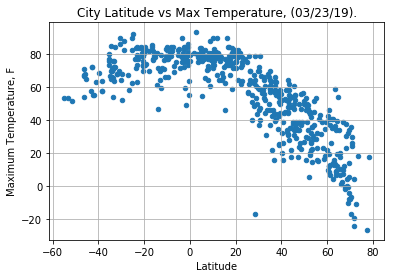

In [15]:
#convert the strings in the to numeric values using pd.to_numeric() function
# use the graph function in matplotlip to plot the graphs shown below.
city_df.Lat=pd.to_numeric(city_df.Lat)
city_df.Cloudiness=pd.to_numeric(city_df.Cloudiness)
city_df.Humidity=pd.to_numeric(city_df.Humidity)
city_df.Long=pd.to_numeric(city_df.Long)
city_df.Max_Temp=pd.to_numeric(city_df.Max_Temp)
city_df.Wind_Speed=pd.to_numeric(city_df.Wind_Speed)
#city_df.Lat=pd.to_numeric(city_df.Lat)
#city_df.Cloudiness=pd.to_numeric(city_df.Cloudiness)
city_df.plot.scatter(x=['Lat'],y=['Max_Temp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature, F')
today =datetime.date.today().strftime("%x")
plt.title(f'City Latitude vs Max Temperature, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Max Temperature')

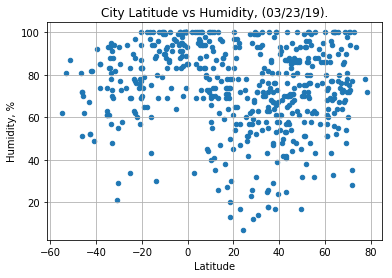

In [16]:
city_df.plot.scatter(x=['Lat'],y=['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity, %')
plt.title(f'City Latitude vs Humidity, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Humidity')

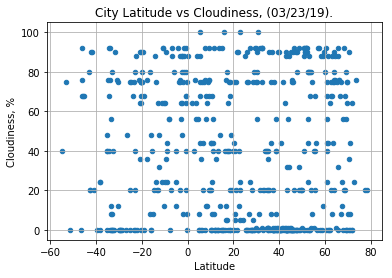

In [17]:
city_df.plot.scatter(x=['Lat'],y=['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness, %')
plt.title(f'City Latitude vs Cloudiness, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Cloudiness')

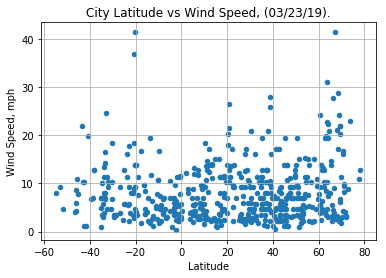

In [18]:
city_df.plot.scatter(x=['Lat'],y=['Wind_Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed, mph')
plt.title(f'City Latitude vs Wind Speed, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Wind Speed')

In [ ]:
#Observations
#1 The temperature increases as one moves towards the equator
#2 The wind speed along the equator is not to eractic today.The maximum wind speed observed from the cities along the equator is approximately 12mph
#3 Humidity seems to increase as one moves towards the equator
# I do believe there are better graphs and questions that can be posed to show what is going on along the equator.